# what are the top selling products in the superstore?
# top profits product?
# Are the top selling products the most profitable?
# What is the sales trend over time (monthly, yearly)?
# which  region & place generates the most sales? 
# What is the impact of discount on sales? 
# The Best Sales?
# Most of the sales and Profit come frome?

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
import pandas as pd

file_path = 'Sample.xlsx'

try:
    # Attempt with utf-8
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    # Attempt with ISO-8859-1
    data = pd.read_csv(file_path, encoding='ISO-8859-1')


data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
# Set the maximum number of columns to display
pd.options.display.max_columns = None

# Set the maximum number of rows to display
pd.options.display.max_rows = None

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

some statistical information 

In [9]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# no duplicated value
data.duplicated().sum()

0

In [11]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


categorical data

In [13]:
data_category= data[[ 'Ship Mode', 'Customer ID', 'Customer Name',
             'Segment', 'Country', 'City', 'State', 'Region',
             'Product ID', 'Category', 'Sub-Category', 'Product Name']]

In [14]:
# show the number of uniqe value in categorical data...
for i in data_category:
    print(i , ":" , data[i].nunique())

Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


In [15]:
data["Order ID"].nunique()

5009

# what are the top selling products in the superstore?

In [17]:
# in this case i will work in tow columns 1. product name 2. sales

In [18]:
data_group= data.groupby(["Product Name"]).sum()["Sales"]
# to find the summation about sales for each product name...

In [19]:
data_group.head()

Product Name
"While you Were Out" Message Book, One Form per Page     25.228
#10 Gummed Flap White Envelopes, 100/Box                 41.300
#10 Self-Seal White Envelopes                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 286.672
Name: Sales, dtype: float64

In [20]:
top_seals= data_group.sort_values(ascending=False)

In [21]:
top_seals_Frame= pd.DataFrame(top_seals[:5])

In [22]:
top_seals_Frame
# the 5 top saels >>>

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479


In [23]:
import matplotlib.pyplot as plt

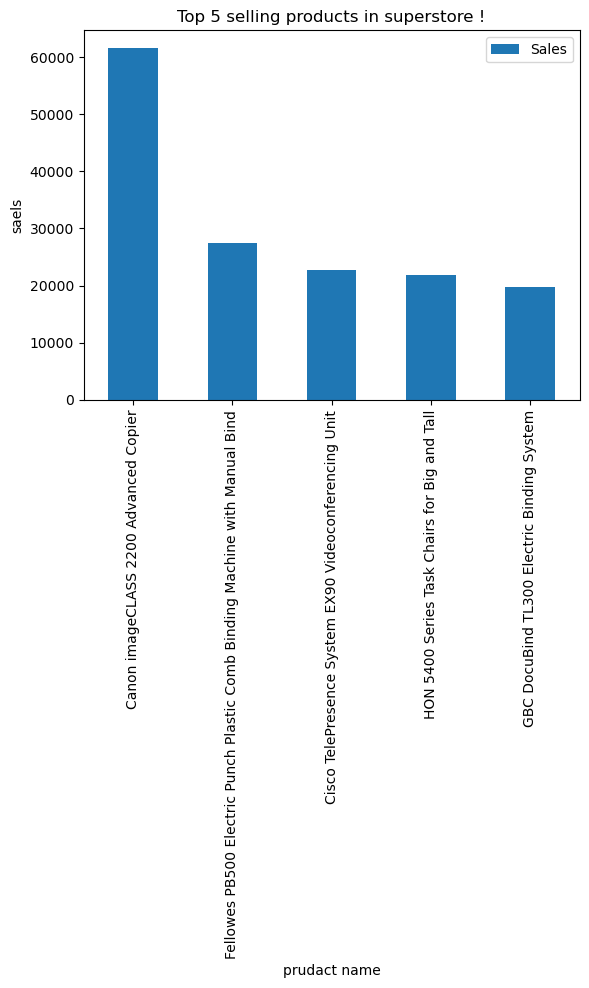

In [24]:
top_seals_Frame.plot(kind= "bar")
plt.title("Top 5 selling products in superstore !")
plt.xlabel("prudact name")
plt.ylabel("saels")
plt.show()

# top profits product?

In [26]:
data_profits_group= data.groupby(["Product Name"]).sum()["Profit"]


In [27]:
data_profits= data_profits_group.sort_values(ascending=False)
data_profits_Frame= pd.DataFrame(data_profits[:5])
data_profits_Frame

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766


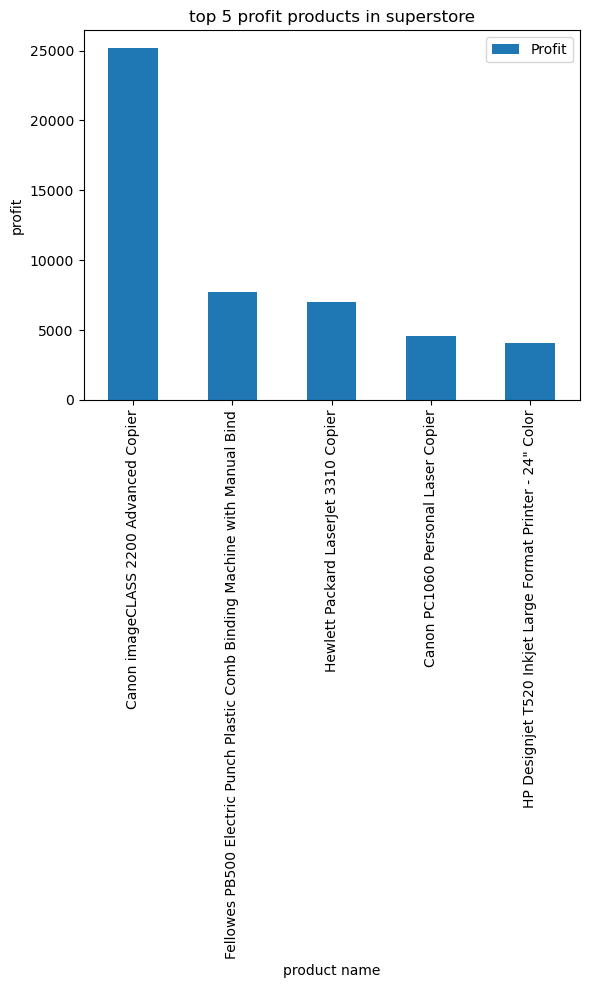

In [28]:
data_profits_Frame.plot(kind= "bar")
plt.title("top 5 profit products in superstore")
plt.xlabel("product name")
plt.ylabel("profit")
plt.show()

# Are the top selling products the most profitable?

In [30]:
data_profits_Frame.index == top_seals_Frame.index

array([ True,  True, False, False, False])

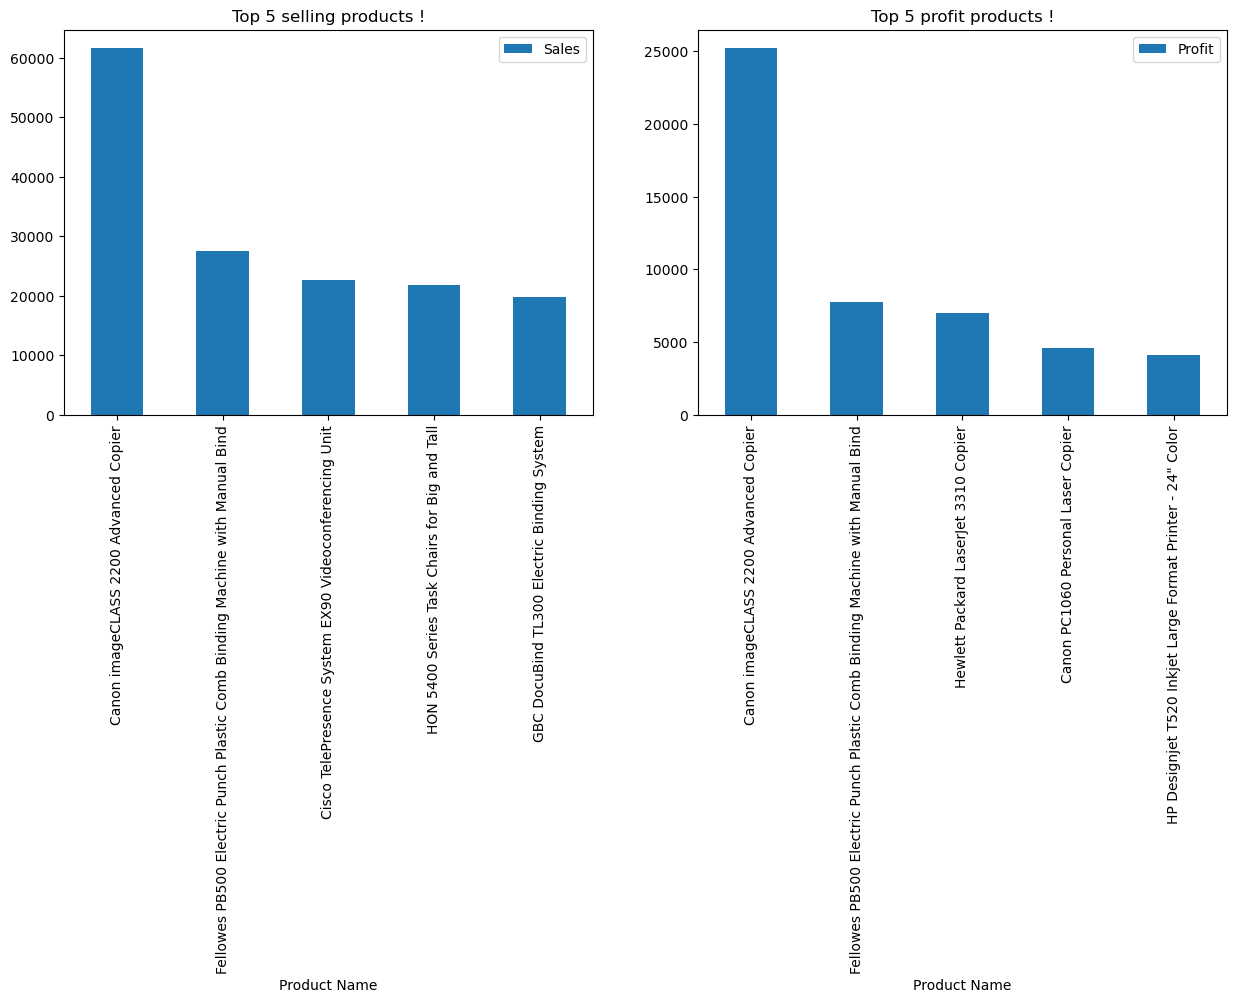

In [31]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(15,5))
#first columns ...
top_seals_Frame.plot(kind= "bar", y="Sales", ax=ax1)
ax1.set_title("Top 5 selling products !")

#seconed columns ...
data_profits_Frame.plot(kind= "bar", y= "Profit", ax=ax2)
ax2.set_title("Top 5 profit products !")

plt.show()

# Now we can conclude some things¶
top_5_selling_products:

Canon imageCLASS 2200 Advanced Copier
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
Cisco TelePresence System EX90 Videoconferencing Unit
HON 5400 Series Task Chairs for Big and Tall
GBC DocuBind TL300 Electric Binding System
top_5_profit_products:

Canon imageCLASS 2200 Advanced Copier
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
Hewlett Packard LaserJet 3310 Copier
Canon PC1060 Personal Laser Copier
HP Designjet T520 Inkjet Large Format Printer - 24" Color
The highest selling products, and the most profitable

Canon imageCLASS 2200 Advanced Copier
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind

......................................................................................................................................................

Region

In [35]:
data.Region.value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [36]:
# this code use to show only the top product...
# product 1
product= data[data["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]

In [37]:
product.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
6425,6426,CA-2016-143714,5/23/2016,5/27/2016,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,Pennsylvania,19120,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968
6826,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808


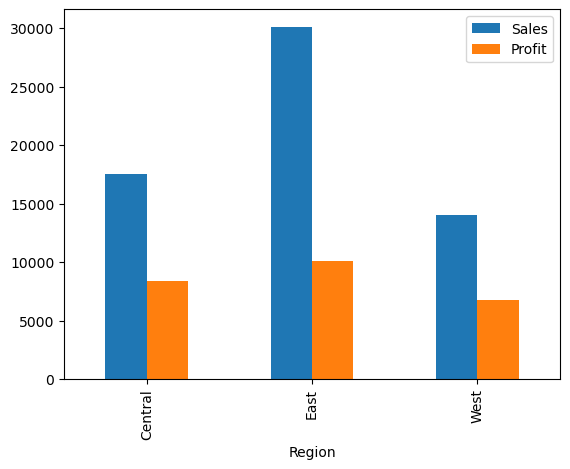

In [38]:
region_group= product.groupby(["Region"]).sum()[["Sales", "Profit"]]

region_group.plot(kind= "bar")
plt.show()

In [39]:
# this code use to show only the top product...
# product 2
product= data[data["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]

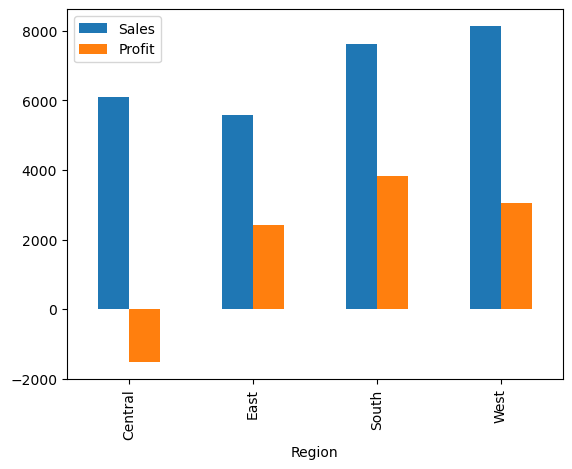

In [40]:
region_group= product.groupby(["Region"]).sum()[["Sales", "Profit"]]

region_group.plot(kind= "bar")
plt.show()

In [41]:
product= data[(data["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (data["Region"]=="Central")]

In [42]:
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,9/10/2017,9/15/2017,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,Illinois,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,11/19/2017,11/21/2017,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,4/28/2015,5/1/2015,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,Michigan,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


In [43]:
# only 3 products!!!

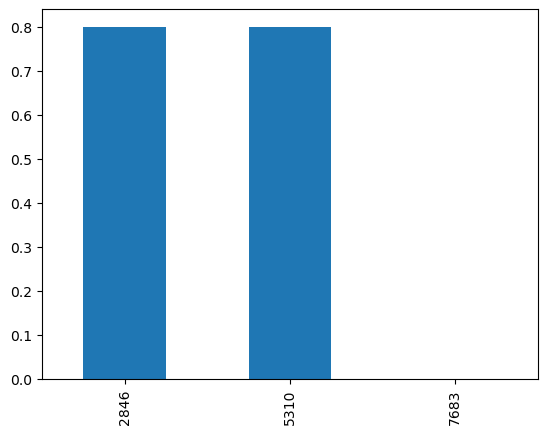

In [44]:
product["Discount"].plot(kind= "bar")
plt.show()

The company loses when it sells its Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind products in the Central! as it make 80% discount on 2 products from 3 products



# What is the sales trend over time (monthly, yearly)?

In [47]:
data['Order Date']= pd.to_datetime(data['Order Date'])
monthly_sales = data.groupby(['Order Date'], as_index=False).sum()
monthly_sales= monthly_sales.set_index("Order Date")
monthly_sales = monthly_sales.resample('M').sum() 
monthly_sales

C:\Users\user\AppData\Local\Temp\ipykernel_17852\2949402348.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = monthly_sales.resample('M').sum()


,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-31,346176,CA-2014-103800CA-2014-112326CA-2014-112326CA-2...,1/7/20141/8/20141/8/20141/8/20141/12/20141/8/2...,Standard ClassStandard ClassStandard ClassStan...,DP-13000PO-19195PO-19195PO-19195MB-18085LS-172...,Darren PowersPhillina OberPhillina OberPhillin...,ConsumerHome OfficeHome OfficeHome OfficeConsu...,United StatesUnited StatesUnited StatesUnited ...,HoustonNapervilleNapervilleNapervillePhiladelp...,TexasIllinoisIllinoisIllinoisPennsylvaniaCalif...,4342297,CentralCentralCentralCentralEastWestSouthSouth...,OFF-PA-10000174OFF-LA-10003223OFF-ST-10002743O...,Office SuppliesOffice SuppliesOffice SuppliesO...,PaperLabelsStorageBindersArtPaperArtChairsBind...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",14236.8950,284,10.00,2450.1907
2014-02-28,272235,CA-2014-140795CA-2014-139857CA-2014-123400CA-2...,2/3/20142/6/20142/9/20142/9/20142/6/20142/6/20...,First ClassStandard ClassStandard ClassStandar...,BD-11500CD-12790EB-13930EB-13930TB-21400TB-214...,Bradley DruckerCynthia DelaneyEric BarretoEric...,ConsumerHome OfficeConsumerConsumerConsumerCon...,United StatesUnited StatesUnited StatesUnited ...,Green BaySan DiegoSaint PetersburgSaint Peters...,WisconsinCaliforniaFloridaFloridaWashingtonWas...,3049775,CentralWestSouthSouthWestWestWestWestWestSouth...,TEC-AC-10001432OFF-FA-10001843OFF-BI-10000666T...,TechnologyOffice SuppliesOffice SuppliesTechno...,AccessoriesFastenersBindersPhonesBindersBinder...,Enermax Aurora Lite KeyboardStaplesSurelock Po...,4519.8920,159,8.10,862.3084
2014-03-31,871575,CA-2014-104269US-2014-143707CA-2014-113880CA-2...,3/6/20143/5/20143/5/20143/5/20143/5/20143/5/20...,Second ClassStandard ClassStandard ClassStanda...,DB-13060HR-14770VF-21715VF-21715SC-20380SC-203...,Dave BrooksHallie RedmondVicky FreymannVicky F...,ConsumerHome OfficeHome OfficeHome OfficeConsu...,United StatesUnited StatesUnited StatesUnited ...,SeattleNew York CityElmhurstElmhurstEl PasoEl ...,WashingtonNew YorkIllinoisIllinoisTexasTexasTe...,8314538,WestEastCentralCentralCentralCentralCentralCen...,FUR-CH-10004063TEC-PH-10003655FUR-CH-10000863O...,FurnitureTechnologyFurnitureOffice SuppliesOff...,ChairsPhonesChairsPaperFastenersChairsFurnishi...,Global Deluxe High-Back Manager's ChairSannysi...,55691.0090,585,26.30,498.7299
2014-04-30,690625,US-2014-157021US-2014-157021CA-2014-138359CA-2...,4/6/20144/6/20144/6/20144/6/20144/8/20144/8/20...,Second ClassSecond ClassStandard ClassStandard...,KM-16720KM-16720KH-16330KH-16330RD-19585RD-195...,Kunst MillerKunst MillerKatharine HarmsKathari...,ConsumerConsumerCorporateCorporateConsumerCons...,United StatesUnited StatesUnited StatesUnited ...,VallejoVallejoRevereRevereAthensAthensAthensHo...,CaliforniaCaliforniaMassachusettsMassachusetts...,7723827,WestWestEastEastSouthSouthSouthCentralCentralS...,OFF-LA-10002312OFF-BI-10000042OFF-ST-10000636O...,Office SuppliesOffice SuppliesOffice SuppliesO...,LabelsBindersStorageBindersPaperPhonesApplianc...,"Avery 490Pressboard Data Binder, Crimson, 12"" ...",28295.3450,536,14.85,3488.8352
2014-05-31,611708,CA-2014-115056CA-2014-124618CA-2014-130274CA-2...,5/2/20145/4/20145/5/20145/10/20145/10/20145/8/...,Same DaySecond ClassFirst ClassStandard ClassS...,AR-10510CS-11860JS-15940NC-18415NC-18415PM-189...,Andrew RobertsCari SchnellingJoni SundaresamNa...,ConsumerConsumerHome OfficeConsumerConsumerCon...,United StatesUnited StatesUnited StatesUnited ...,ColumbusLakelandAppletonYonkersYonkersJacksonM...,OhioFloridaWisconsinNew YorkNew YorkMichiganCo...,6497804,EastSouthCentralEastEastCentralEastCentralCent...,OFF-AP-10003971TEC-CO-10004202OFF-LA-10002195O...,Office SuppliesTechnologyOffice SuppliesOffice...,AppliancesCopiersLabelsBindersBindersBindersFu...,Belkin 6 Outlet Metallic Surge StripBrother DC...,23648.2870,466,18.95,2738.

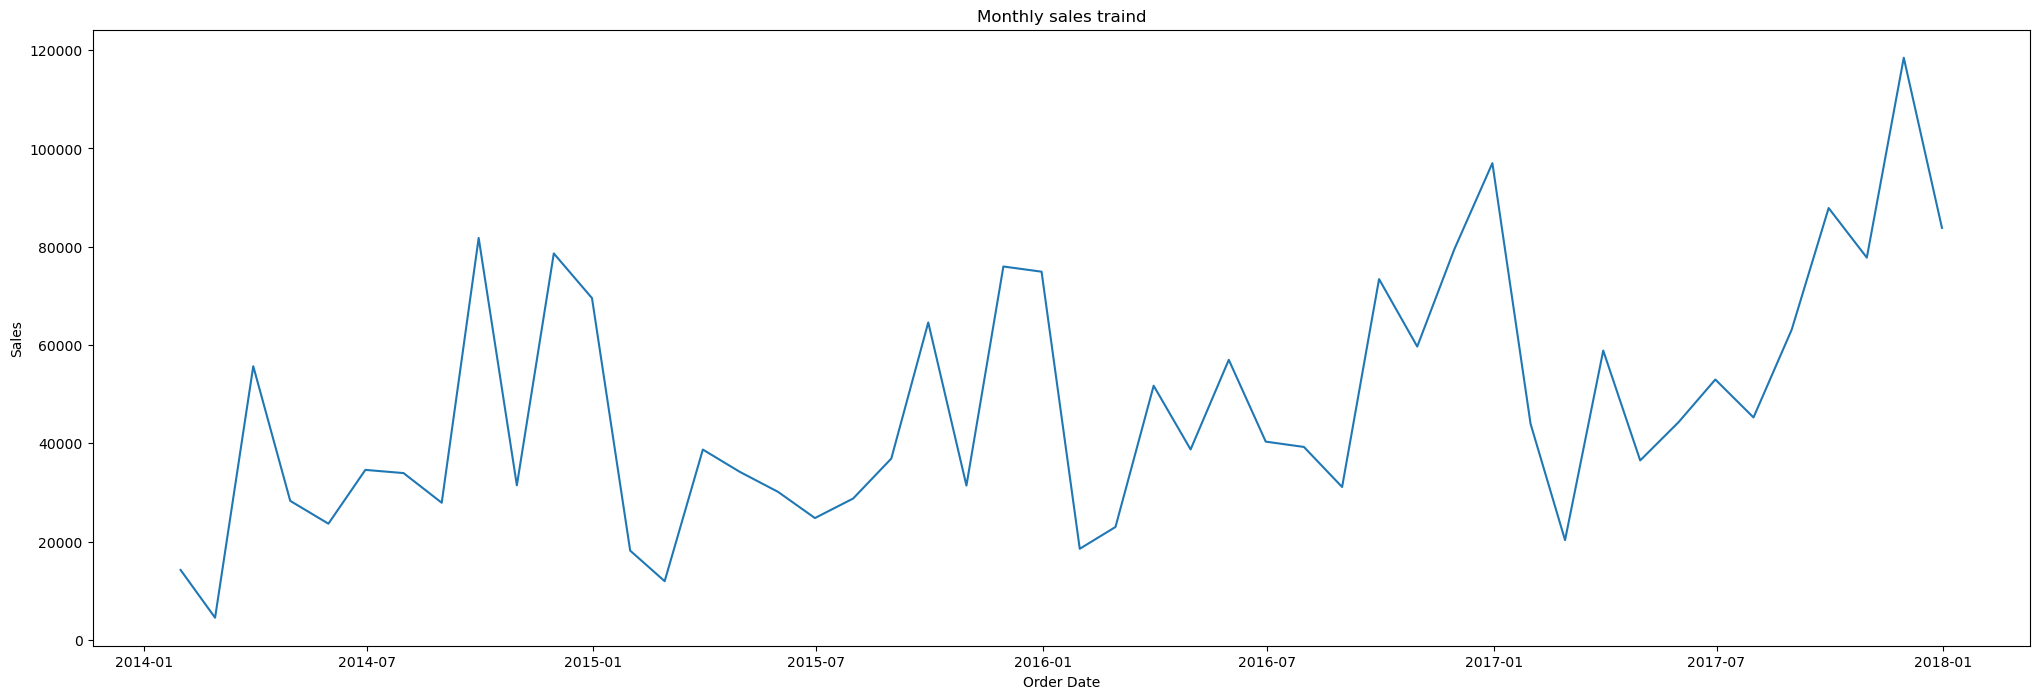

In [48]:
plt.figure(figsize=(25, 8))
plt.plot(monthly_sales['Sales'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Monthly sales traind")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17852\2363346823.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = monthly_sales.resample('Y').sum()


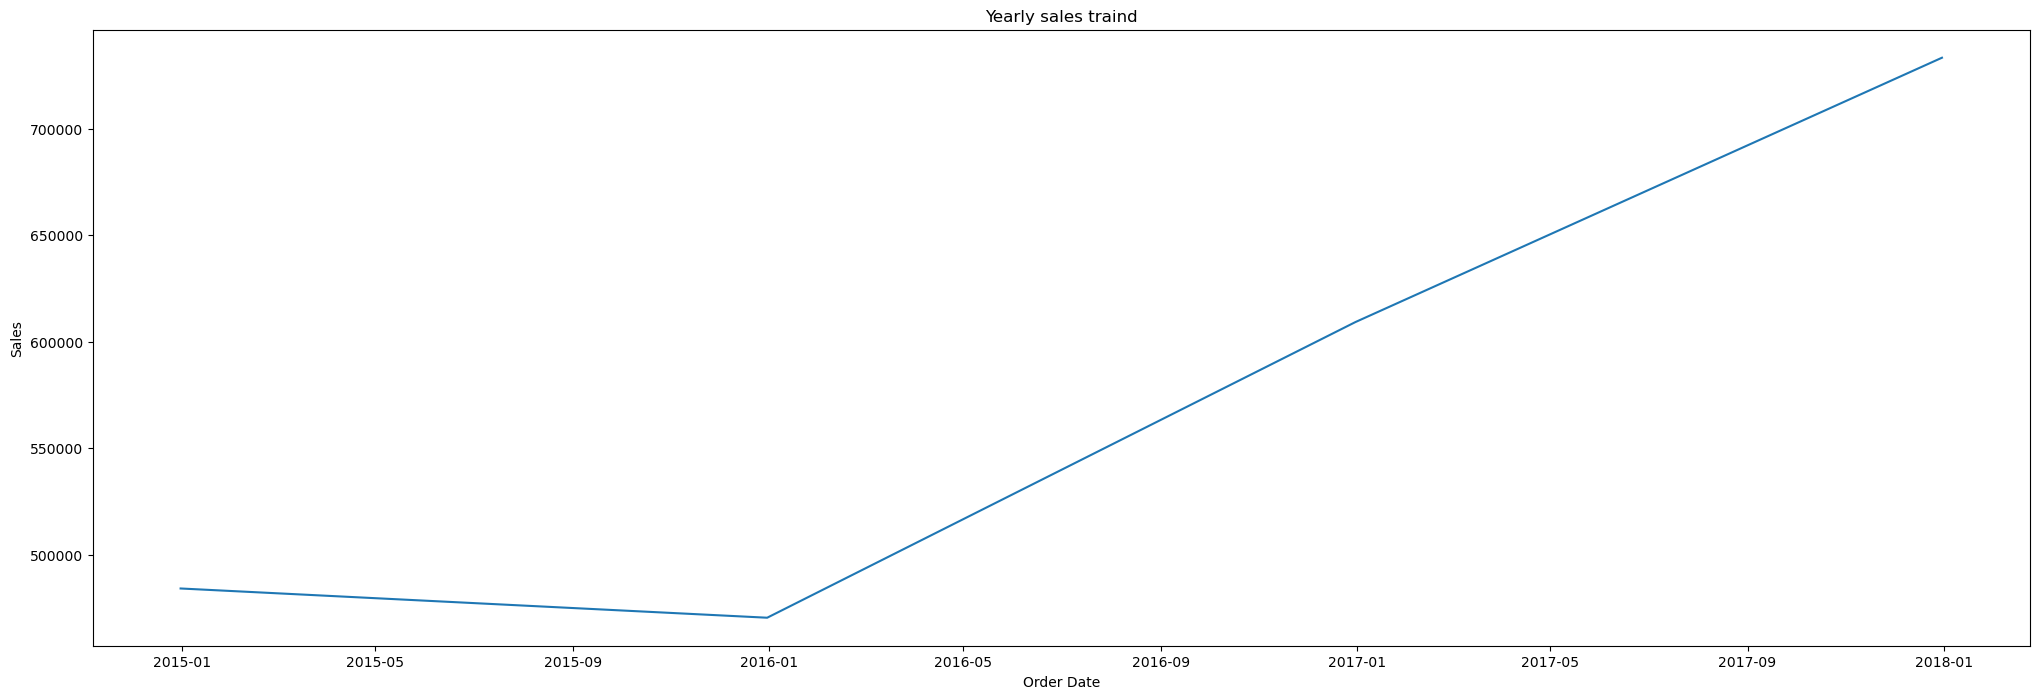

In [49]:
# trend over monthly / yearly...
yearly_sales = monthly_sales.resample('Y').sum() 

plt.figure(figsize=(25, 8))
plt.plot(yearly_sales['Sales'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Yearly sales traind")
plt.show()

# which  region & place generates the most sales? 

In [51]:
data_place= data[["Country", "City", "State", "Region"]]
data_place.head()

,Country,City,State,Region
0,United States,Henderson,Kentucky,South
1,United States,Henderson,Kentucky,South
2,United States,Los Angeles,California,West
3,United States,Fort Lauderdale,Florida,South
4,United States,Fort Lauderdale,Florida,South


In [52]:
data_place.nunique() 

Country      1
City       531
State       49
Region       4
dtype: int64

In [53]:
data_place= data[["City", "State", "Region", "Sales", "Profit"]]
data_place.head()

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164


In [54]:
data_place_group= data_place.groupby(['Region'], as_index=False).sum()
data_place_group.sort_values(by='Sales', ascending=False, inplace=True)
data_place_group

,Region,City,State,Sales,Profit
3,West,Los AngelesLos AngelesLos AngelesLos AngelesLo...,CaliforniaCaliforniaCaliforniaCaliforniaCalifo...,725457.8245,108418.4489
1,East,PhiladelphiaPhiladelphiaPhiladelphiaPhiladelph...,PennsylvaniaPennsylvaniaPennsylvaniaPennsylvan...,678781.2400,91522.7800
0,Central,Fort WorthFort WorthMadisonFremontFremontHoust...,TexasTexasWisconsinNebraskaNebraskaTexasTexasT...,501239.8908,39706.3625
2,South,HendersonHendersonFort LauderdaleFort Lauderda...,KentuckyKentuckyFloridaFloridaNorth CarolinaFl...,391721.9050,46749.4303


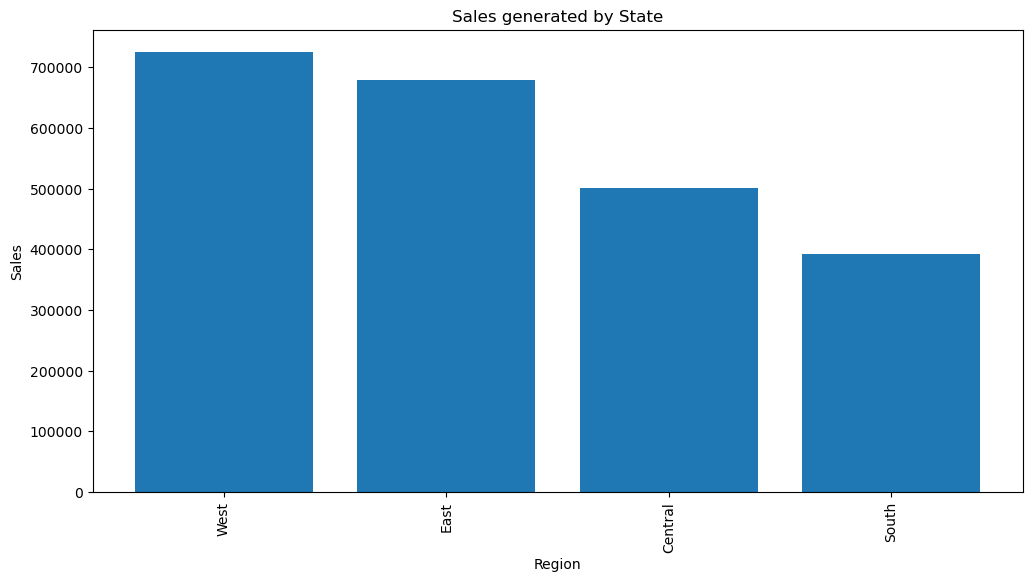

In [55]:
plt.figure(figsize=(12, 6))
plt.bar(data_place_group['Region'], data_place_group['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales generated by State")
plt.xticks(rotation= 90)
plt.show()

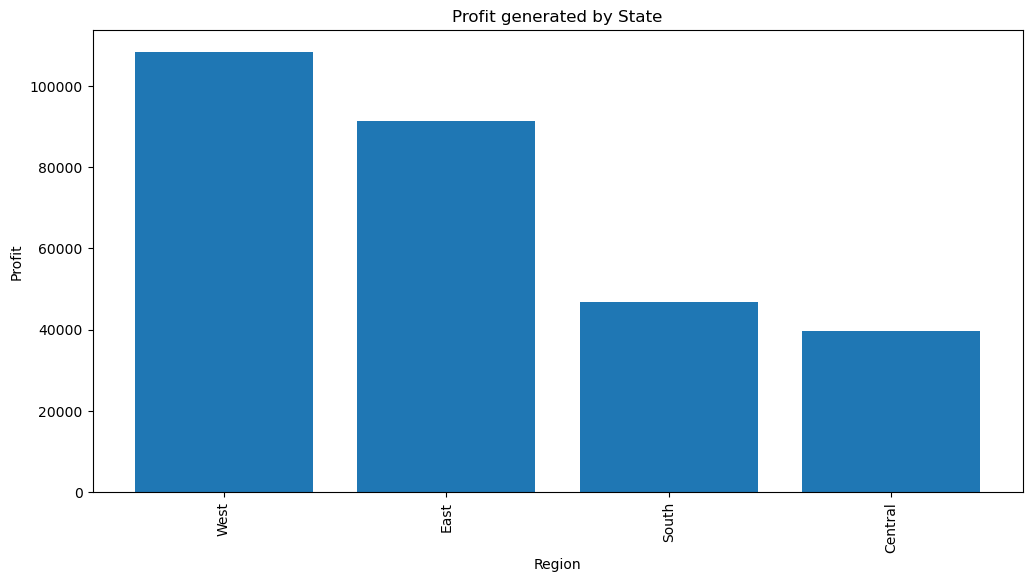

In [56]:
data_place_group= data_place.groupby(['Region'], as_index=False).sum()
data_place_group.sort_values(by='Profit', ascending=False, inplace=True)
data_place_group

plt.figure(figsize=(12, 6))
plt.bar(data_place_group['Region'], data_place_group['Profit'], align='center',)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Profit generated by State")
plt.xticks(rotation= 90)
plt.show()

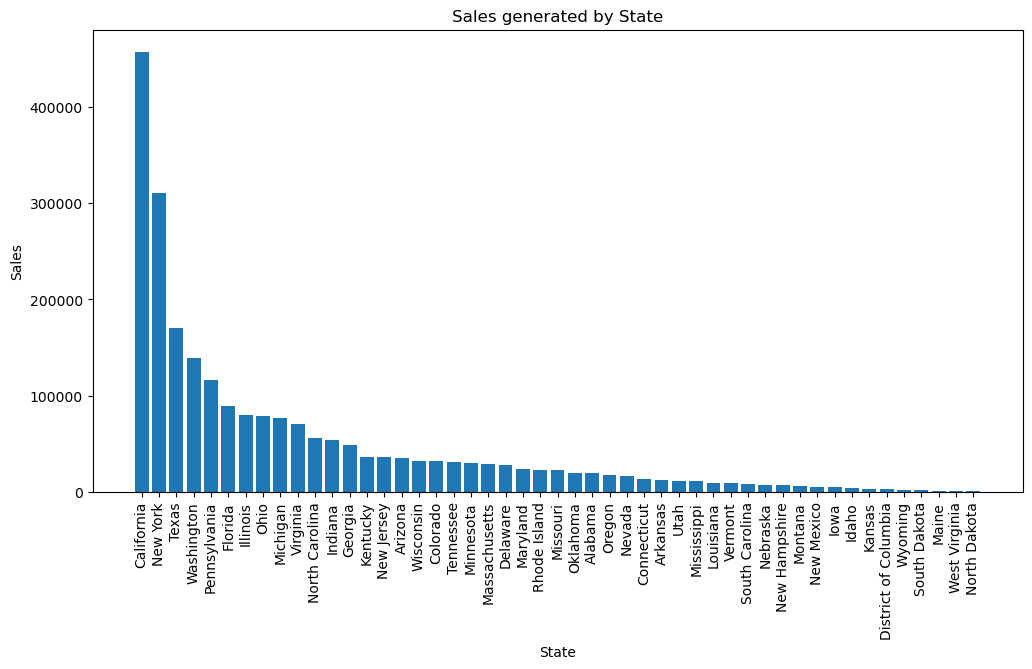

In [57]:
data_place_group= data_place.groupby(['State'], as_index=False).sum()
data_place_group.sort_values(by='Sales', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(data_place_group['State'], data_place_group['Sales'], align='center',)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales generated by State")
plt.xticks(rotation= 90)
plt.show()

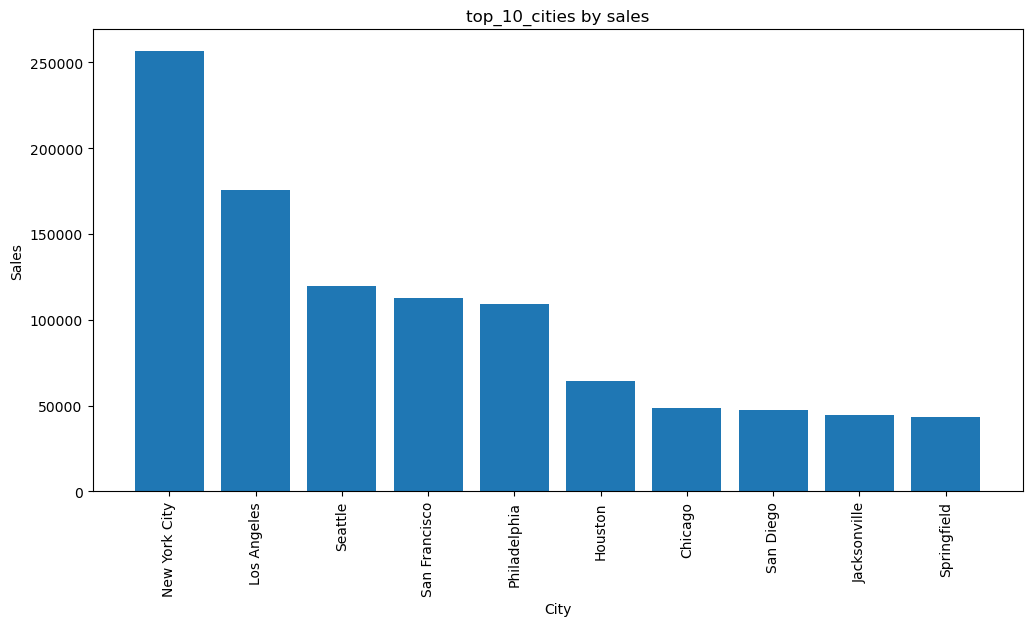

In [58]:
data_place_group= data_place.groupby(['City'], as_index=False).sum()
data_place_group.sort_values(by='Sales', ascending=False, inplace=True)

top_10_cities= data_place_group.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities['City'], top_10_cities['Sales'], align='center',)
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("top_10_cities by sales")
plt.xticks(rotation= 90)
plt.show()

In [59]:
top_10_cities.City

329    New York City
266      Los Angeles
452          Seattle
438    San Francisco
374     Philadelphia
207          Houston
80           Chicago
437        San Diego
216     Jacksonville
464      Springfield
Name: City, dtype: object

# What is the impact of discount on sales? 

In [61]:
data.Discount.value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

In [79]:
import matplotlib.pyplot as plt

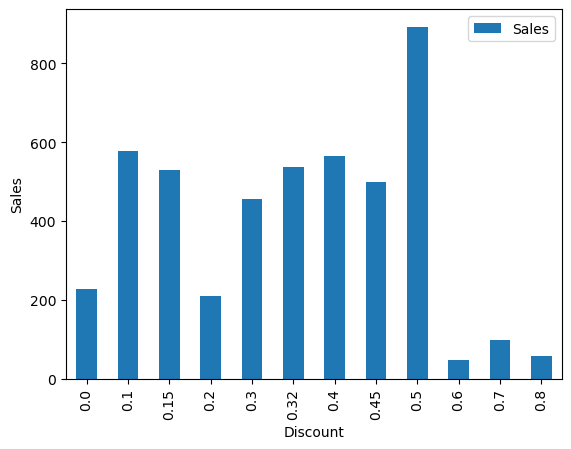

In [81]:
Discount_group= data.groupby(["Discount"]).mean( numeric_only=True)[['Sales']]
Discount_group.plot(kind= 'bar')
plt.ylabel("Sales")
plt.show()

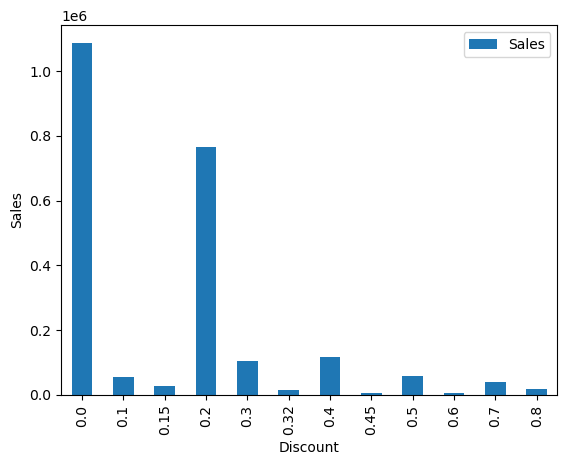

In [77]:
Discount_group= data.groupby(["Discount"]).sum(numeric_only=True)[['Sales']]
Discount_group.plot(kind= 'bar')
plt.ylabel("Sales")
plt.show()

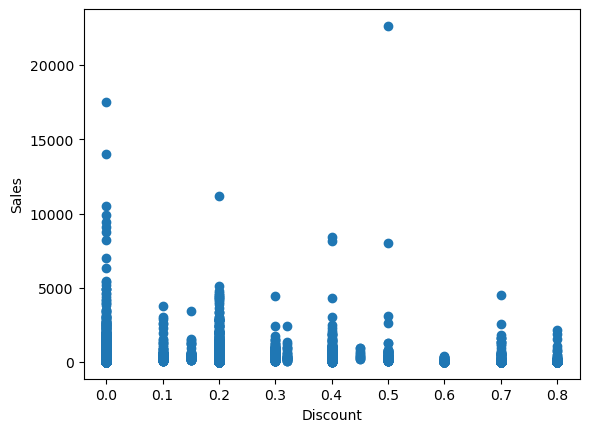

In [83]:
plt.scatter(data["Discount"], data["Sales"])
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.show()

In [85]:
data.shape

(9994, 21)

# The Best Sales:

In [88]:
profit_category= data.groupby("Category")["Profit"].mean()

print(profit_category)

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


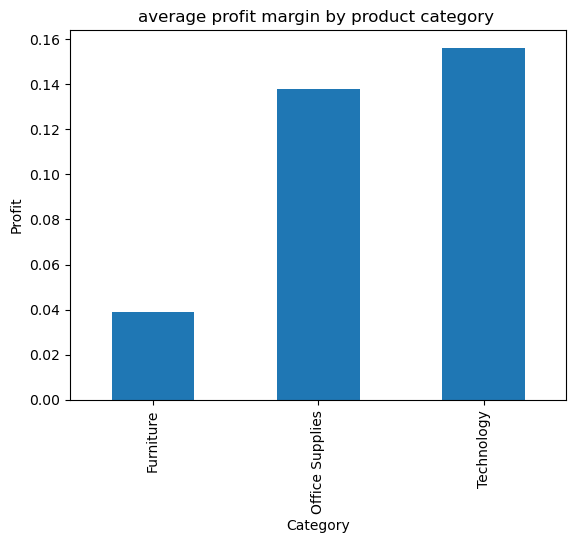

In [90]:
data['Profit Margin']= data['Profit']/data['Sales']
profit_category= data.groupby("Category")["Profit Margin"].mean()

profit_category.plot(kind= 'bar')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title("average profit margin by product category ")
plt.show()

# Customers 

In [93]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125


In [97]:
data.Segment.value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [99]:
data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [101]:
pivot_table= data.pivot_table(index="Segment", columns="Ship Mode",values= 'Sales' ,aggfunc='sum')

In [103]:
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,239038.1365


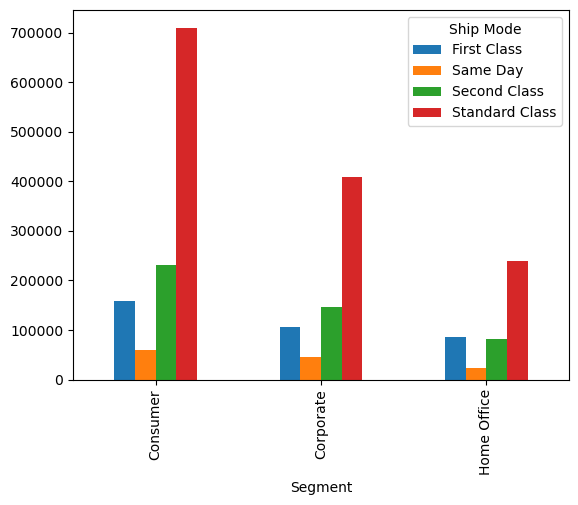

In [105]:
pivot_table.plot(kind= 'bar')
plt.show()

# Most of the sales and Profit come frome (Consumer) who use (Standard Class) shipping mode.

In [108]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125
